In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### Create graphs to explore what happened ####
'''
1. An histogram with the percentage idenntity of the alignments
'''

In [2]:
### Libraries ###
import sys
import matplotlib.pyplot as plt
import os
import numpy as np

Histogram of percentage identity

In [4]:
# Get the percentage identity of the alignments
pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/03_IroN_BLAST_results'
blastFiles = os.listdir(pathDir)

# Create a list with the percentage identity of the alignments
percentageIdentitySalmonella = []
percentageIdentityEnterobacteriaceae = []
for blastFile in blastFiles:
    if blastFile.startswith('GCA_'):
        evaluePI = {}
        with open(pathDir + '/' + blastFile, 'r') as file:
            for line in file:
                if line.startswith('#'):
                    continue
                else:
                    line = line.split('\t')
                    evaluePI[float(line[10])] = float(line[2])
        if evaluePI:
            percentageIdentitySalmonella.append(evaluePI[max(evaluePI.keys())])
    else:
        evaluePI = {}
        with open(pathDir + '/' + blastFile, 'r') as file:
            for line in file:
                if line.startswith('#'):
                    continue
                else:
                    line = line.split('\t')
                    evaluePI[float(line[10])] = float(line[2])
        if evaluePI:
            percentageIdentityEnterobacteriaceae.append(evaluePI[max(evaluePI.keys())])

print(len(percentageIdentitySalmonella))
print(len(percentageIdentityEnterobacteriaceae))
print(percentageIdentitySalmonella)

7472
549
[80.547, 82.09, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 82.09, 82.09, 82.09, 80.851, 82.09, 80.547, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.547, 80.851, 80.547, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 84.783, 81.155, 80.851, 80.851, 80.851, 80.851, 80.488, 80.851, 82.09, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.547, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.488, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 85.0, 80.851, 82.09, 80.851, 80.851, 80.851, 82.09, 82.09, 80.851, 82.09, 80.851, 80.793, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.8

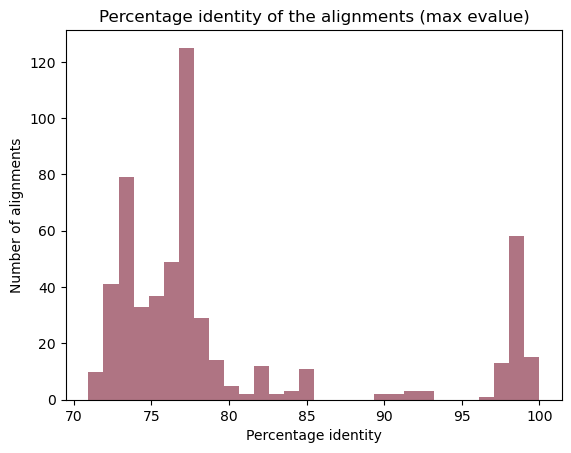

In [6]:
# Make the histogram
plt.hist(percentageIdentityEnterobacteriaceae, bins=30, color='#8E394E', alpha=0.7)
plt.xlabel('Percentage identity')
plt.ylabel('Number of alignments')
plt.title('Percentage identity of the alignments (max evalue)')
plt.show()

In [8]:
import statistics
mean_value = statistics.mean(percentageIdentitySalmonella)
median_value = statistics.median(percentageIdentitySalmonella)
mode_value = statistics.mean(percentageIdentitySalmonella)

print(mean_value)
print(median_value)
print(mode_value)

80.95643883832976
80.851
80.95643883832976


See if there's relation between sequence length and number of promoters found

In [22]:
# Let's create a numpy array to save our results
lengthPromoters = np.zeros((0,2))

# Column 0 is length, column 1 is the number of promoters found

In [24]:
pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_results_salmonella'
Files = os.listdir(pathDir)

# Create a list with the percentage identity of the alignments

for BPromfile in Files:
    with open(pathDir + '/' + BPromfile, 'r') as file:
        lines = file.readlines()
    # Let' obtain the length of the sequence
    seqLength = int(lines[1].split(" ")[-1].strip())

    # Let's obtain the number of predicted promoters
    startCounting = False
    numberPromoters = 0
    for i in lines:
        if i.startswith("For"):
            startCounting = True
            continue
        if startCounting:
            numberPromoters += 1
    lengthPromoters = np.vstack([lengthPromoters, np.array([seqLength, numberPromoters])])

print(lengthPromoters.shape)
print(lengthPromoters[0:10, :])


(1278, 2)
[[80.  3.]
 [80.  3.]
 [80.  3.]
 [80.  0.]
 [80.  3.]
 [80.  3.]
 [80.  3.]
 [80.  4.]
 [80.  3.]
 [80.  4.]]


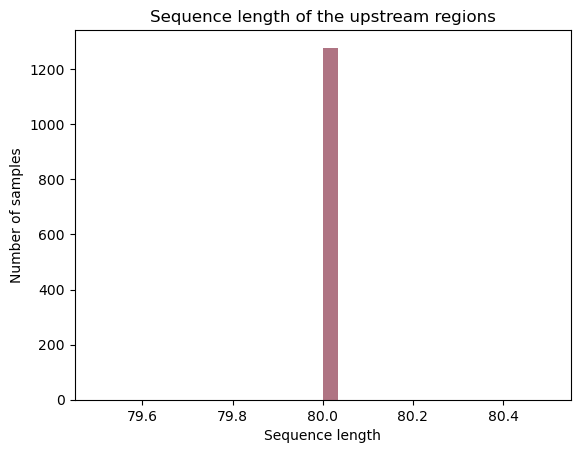

In [29]:
plt.hist(lengthPromoters[: , 0], bins=30, color='#8E394E', alpha=0.7)
plt.xlabel('Sequence length')
plt.ylabel('Number of samples')
plt.title('Sequence length of the upstream regions')
plt.show()

In [28]:
column_to_check = 0
unique_numbers = np.unique(lengthPromoters[:, column_to_check])

print("Unique numbers in column {}: {}".format(column_to_check, unique_numbers))

Unique numbers in column 0: [80.]


In [3]:
### This is weird, all the sequences have the same length, let's check the original fasta file
pathEntero = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/enterobacteriaceae_upstream_seqs_300_bp_trimmed.fa'
pathSalmo = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/salmonella_upstream_seqs_300_bp_trimmed.fa'

seqLengths = []
with open(pathEntero, 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith('>'):
            continue
        else:
            seqLengths.append(len(line.strip()))

with open(pathSalmo, 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith('>'):
            continue
        else:
            seqLengths.append(len(line.strip()))

print(np.unique(seqLengths))

### So basically BProm is taking the first 80 bp of the sequence and ignoring the rest
### BProm: 80
### Raw seq length: [126 129 132 152 168 174 186 188 189 197 201 247 253 264 271 279 298 300]

[126 129 132 152 168 174 186 188 189 197 201 247 253 264 271 279 298 300]


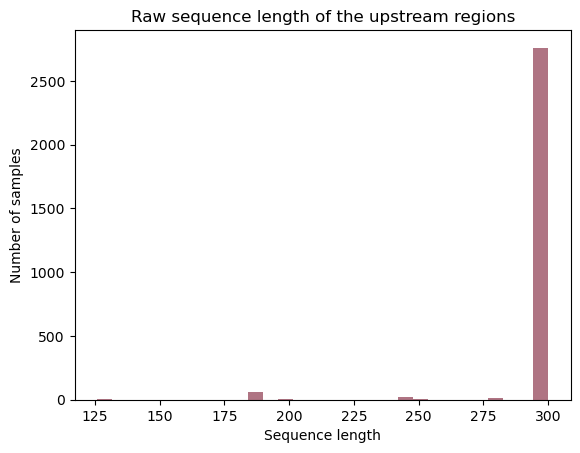

In [4]:
plt.hist(seqLengths, bins=30, color='#8E394E', alpha=0.7)
plt.xlabel('Sequence length')
plt.ylabel('Number of samples')
plt.title('Raw sequence length of the upstream regions')
plt.show()

Histogram of LDF

In [15]:
def read_LDFs(path, LDFlist):
    with open(path, 'r') as file:
        lines = file.readlines()
    ldfValue = lines[4].split(' ')[-1].strip()
    LDFlist.append(float(ldfValue))

LDFs = []
inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_results_enterobacteriaceae'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]

for file in fileList:
    read_LDFs(file, LDFs)

inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_results_salmonella'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]

for file in fileList:
    read_LDFs(file, LDFs)

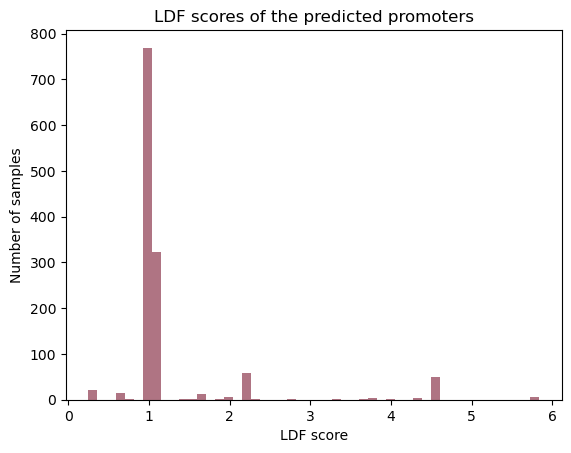

In [19]:
plt.hist(LDFs, bins=50, color='#8E394E', alpha=0.7)
plt.xlabel('LDF score')
plt.ylabel('Number of samples')
plt.title('LDF scores of the predicted promoters')
plt.show()

Position of predicted promoters

In [9]:
#### For the positions of the predicted promoters
def read_positions(path, positionsList):
    with open(path, 'r') as file:
        fileLines = file.readlines()
    # First, I'll filter the lines before the first promoter
    startProcessing = False
    filteredLines = []
    for line in fileLines:
        if line.startswith("For promoter"):
            startProcessing = True
        if startProcessing:
            filteredLines.append(line)

    # Then, I'll get the promoters
    promoters = []
    currentPromoter = []
    # Iterate over the lines and dump the possible promoters into the currentPromoter list
    for line in filteredLines:
        if line.startswith("For promoter"):
            promoters.append(currentPromoter)
            currentPromoter = []
            continue
        # Skip adding the "For promoter" line to the current section, we only care about the identified promoters
        currentPromoter.append(line)

    # Don't forget to add the last section if it exists
    if currentPromoter:
        promoters.append(currentPromoter)
        # Now, let's get the list of the most possible promoters per each identified promoters
    # In other words, the promoters influencing iroN
    iroNpromoters = []

    for promoter in promoters:
        # I'll create a dictionary to store the information: keys as scores and values as the name of the promoter
        for oligo in promoter:
            oligo = oligo.strip().split(" ")
            if oligo[-1] != 'sites':
                try:
                    distance = int(oligo[10])
                except:
                    distance = int(oligo[11])
            iroNpromoters.append(distance)
    
    positionsList += iroNpromoters
           
    return positionsList

positionsList = []
inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_results_enterobacteriaceae'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]

for file in fileList:
    read_positions(file, positionsList)

inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_results_salmonella'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]

for file in fileList:
    read_positions(file, positionsList)

In [10]:
print(positionsList)

[20, 39, 67, 25, 39, 67, 25, 39, 67, 14, 33, 61, 25, 39, 67, 14, 33, 61, 25, 30, 39, 67, 25, 39, 67, 25, 30, 39, 67, 14, 33, 61, 20, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 14, 33, 61, 11, 15, 28, 30, 58, 25, 39, 67, 25, 39, 67, 14, 33, 61, 25, 39, 67, 31, 41, 58, 71, 73, 25, 39, 67, 25, 30, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 14, 33, 61, 25, 39, 67, 14, 33, 61, 70, 72, 25, 30, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 14, 33, 61, 14, 33, 61, 20, 39, 67, 25, 39, 67, 14, 33, 61, 25, 39, 67, 25, 39, 67, 18, 20, 39, 67, 25, 39, 67, 18, 20, 39, 67, 25, 30, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 20, 39, 67, 14, 33, 61, 25, 39, 67, 14, 33, 61, 18, 20, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 14, 33, 61, 14, 33, 61, 14, 33, 61, 25, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 25, 39, 67, 14, 33, 61, 25, 39, 67, 52, 64, 65, 18, 20, 39, 67, 14, 33, 61, 25, 39, 67, 14, 33, 61, 50, 14, 33, 61, 25, 39, 67, 25, 39, 67, 25, 39, 67,

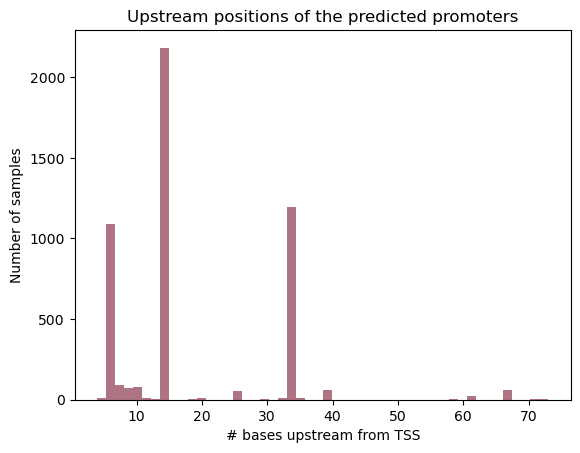

In [11]:
plt.hist(positionsList, bins=50, color='#8E394E', alpha=0.7)
plt.xlabel('# bases upstream from TSS')
plt.ylabel('Number of samples')
plt.title('Upstream positions of the predicted promoters')
plt.show()

In [12]:
### Check the proportion of the promoters within 40 bp upstream
promoters40bp = [i for i in positionsList if i <= 40]
print(len(promoters40bp))
print(len(positionsList))   
print(len(promoters40bp) / len(positionsList))

4891
4992
0.9797676282051282
